In [67]:
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [144]:
file = './xai/output/json/lr_tx_anchors_explanations.json'

In [145]:
with open(file, 'r', encoding='utf-8') as f:
    dados = json.load(f)

In [146]:
# HOMME - 1
# FEMME - 2
len(dados.items())

13593

In [147]:
sex = {
    'femme': 0,
    'homme': 0
}
for chave, valor in dados.items():        
    for f in valor.get('features'):
        if f.get('feature_name') == 'SEX':
            if f.get('feature_value') == 1:
                sex['homme'] += 1
            else:
                sex['femme'] += 1

sex

{'femme': 1993, 'homme': 1711}

In [ ]:
# tem feature duplicada??

In [91]:
%cd finances

/home/luana/Bureau/finances


In [148]:
def plot_sex_anchors_comparison(true_pred, false_pred, title_suffix=""):
    # Map anchor's labels
    labels_map = {
        'SEX <= 1.00': 'Male (SEX=1)',
        'SEX > 1.00': 'Female (SEX>1)',
        'SEX <= 2.00': 'Female (SEX=2)'
    }
    
    # Process data
    categories = ['Male (SEX=1)', 'Female (SEX>1)', 'Both (SEX<=2)']
    true_counts = [true_pred.get('SEX <= 1.00', 0), 
                   true_pred.get('SEX > 1.00', 0), 
                   true_pred.get('SEX <= 2.00', 0)]
    false_counts = [false_pred.get('SEX <= 1.00', 0), 
                    false_pred.get('SEX > 1.00', 0), 
                    false_pred.get('SEX <= 2.00', 0)]
    
    # Configure graphic
    x = np.arange(len(categories))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8, 4))
    rects1 = ax.bar(x - width/2, true_counts, width, label='True Predictions', color='#ff7f0e')
    rects2 = ax.bar(x + width/2, false_counts, width, label='False Predictions', color='#1f77b4')
    
    # Adiciona texto e formatação
    ax.set_ylabel('Anchors count')
    ax.set_title(f"Distribution of Anchors by SEX feature: {title_suffix}")
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    
    # Adiciona valores nas barras
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    
    plt.tight_layout()
    plt.show()

In [149]:
def analyse_anchors(cond = [], cond_value = []):
    if len(cond) != len(cond_value):
        raise ValueError("As listas 'cond' e 'cond_value' devem ter o mesmo tamanho")
        
    sex_anchors = dict()
    for chave, valor in dados.items():
        all_cond = True
        if len(cond) != 0:
            for c, v in zip(cond, cond_value):
                if c == 'precision':
                    condition = valor.get('precision') > v
                elif c == 'prediction':
                    condition = valor.get('prediction') == v
                elif c == 'coverage':
                    condition = valor.get('coverage') > v
                elif c == 'num_features':
                    condition = len(valor.get('features')) <= v
                else:
                    condition = True
                all_cond = all_cond and condition
        
        if all_cond:
            for f in valor.get('features'):
                if f.get('feature_name') == 'SEX':
                    feature_range = f.get('feature_ranges')
                        
                    if feature_range not in sex_anchors:
                        sex_anchors[feature_range] = 0
                    
                    sex_anchors[feature_range] += 1

    return sex_anchors

For true predictions: {'SEX <= 1.00': 1705, 'SEX <= 2.00': 27} 
For false predictions: {'SEX > 1.00': 1966, 'SEX <= 2.00': 6}


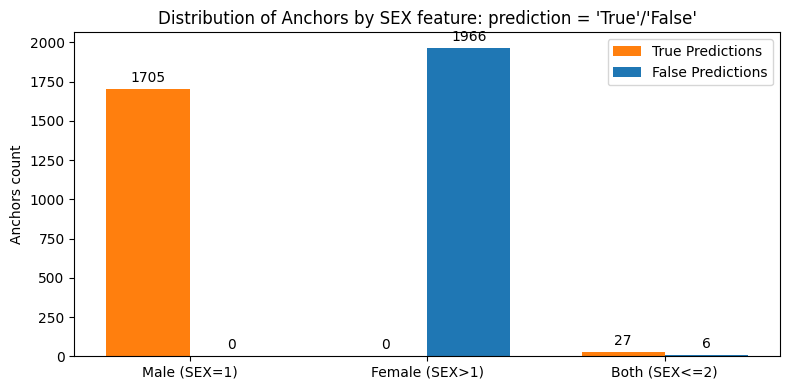

For true predictions and coverage > 0.2: {} 
For false predictions and coverage > 0.2: {'SEX > 1.00': 289, 'SEX <= 2.00': 1}


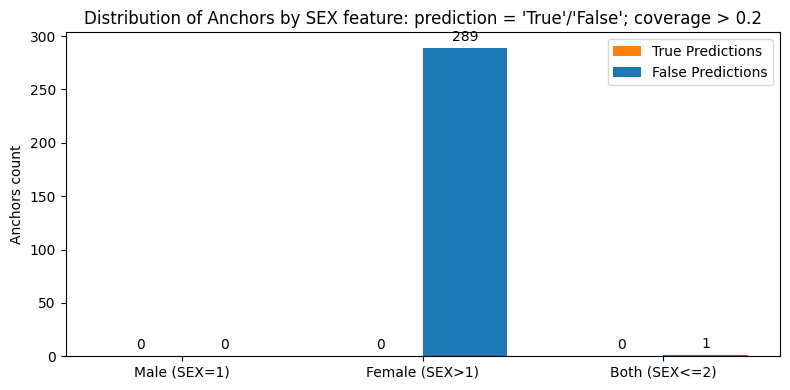

For true predictions and precision > 0.95: {'SEX <= 1.00': 1620, 'SEX <= 2.00': 3} 
For false predictions and precision > 0.95: {'SEX > 1.00': 1965, 'SEX <= 2.00': 1}


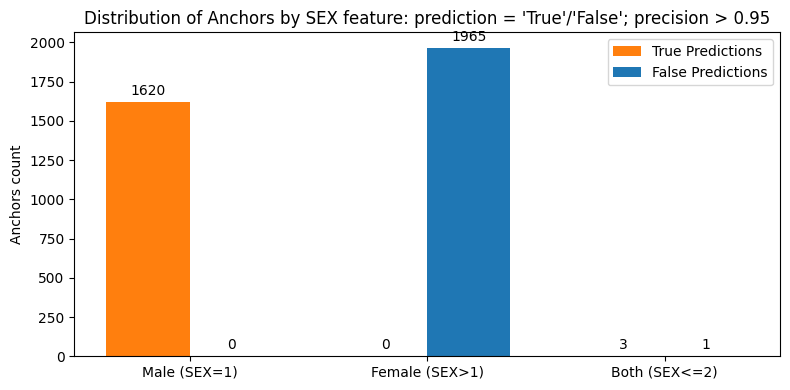

For true predictions and num_features <= 3: {'SEX <= 1.00': 38} 
For false predictions and num_features <= 3: {'SEX > 1.00': 1922}


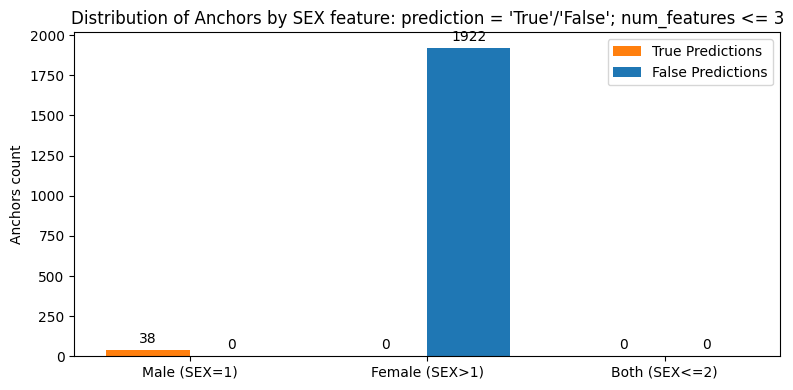

For true predictions and precision > 0.95 and coverage > 0.2: {} 
For false predictions and precision > 0.95 and coverage > 0.2: {'SEX > 1.00': 289}


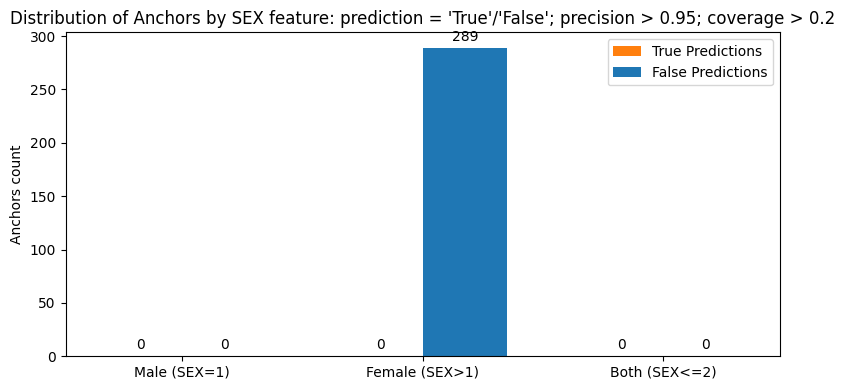

In [151]:
true_label = "True"
false_label = "False"

true = analyse_anchors(['prediction'], [true_label])
false = analyse_anchors(['prediction'], [false_label])
print(f"For true predictions: {true} \nFor false predictions: {false}")
plot_sex_anchors_comparison(true, false, "prediction = 'True'/'False'")

true = analyse_anchors(['prediction', 'coverage'], [true_label, 0.2])
false = analyse_anchors(['prediction', 'coverage'], [false_label, 0.2])
print(f"For true predictions and coverage > 0.2: {true} \nFor false predictions and coverage > 0.2: {false}")
plot_sex_anchors_comparison(true, false, "prediction = 'True'/'False'; coverage > 0.2")

true = analyse_anchors(['prediction', 'precision'], [true_label, 0.95])
false = analyse_anchors(['prediction', 'precision'], [false_label, 0.95])
print(f"For true predictions and precision > 0.95: {true} \nFor false predictions and precision > 0.95: {false}")
plot_sex_anchors_comparison(true, false, "prediction = 'True'/'False'; precision > 0.95")

true = analyse_anchors(['prediction', 'num_features'], [true_label, 3])
false = analyse_anchors(['prediction', 'num_features'], [false_label, 3])
print(f"For true predictions and num_features <= 3: {true} \nFor false predictions and num_features <= 3: {false}")
plot_sex_anchors_comparison(true, false, "prediction = 'True'/'False'; num_features <= 3")

true = analyse_anchors(['prediction', 'precision', 'coverage'], [true_label, 0.95, 0.2])
false = analyse_anchors(['prediction', 'precision', 'coverage'], [false_label, 0.95, 0.2])
print(f"For true predictions and precision > 0.95 and coverage > 0.2: {true} \nFor false predictions and precision > 0.95 and coverage > 0.2: {false}")
plot_sex_anchors_comparison(true, false, "prediction = 'True'/'False'; precision > 0.95; coverage > 0.2")

For true predictions and num_features <= 10: {'SEX <= 1.00': 2221, 'SEX <= 2.00': 210, 'SEX > 1.00': 1} 
For false predictions and num_features <= 10: {'SEX > 1.00': 1527, 'SEX <= 2.00': 109, '1.00 < SEX <= 2.00': 46, 'SEX <= 1.00': 8}


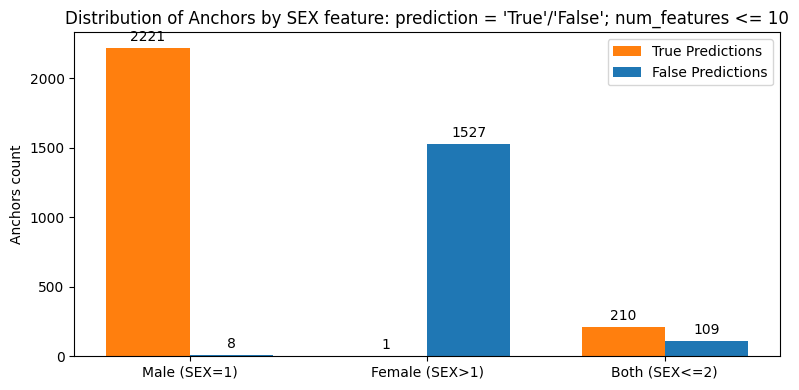

In [142]:
true = analyse_anchors(['prediction', 'num_features'], [true_label, 3])
false = analyse_anchors(['prediction', 'num_features'], [false_label, 3])
print(f"For true predictions and num_features <= 10: {true} \nFor false predictions and num_features <= 10: {false}")
plot_sex_anchors_comparison(true, false, "prediction = 'True'/'False'; num_features <= 10")

In [ ]:
def analyse_anchors(cond = [], cond_value = []):
    if len(cond) != len(cond_value):
        raise ValueError("As listas 'cond' e 'cond_value' devem ter o mesmo tamanho")
        
    sex_anchors = dict()
    for chave, valor in dados.items():
        all_cond = True
        if len(cond) != 0:
            for c, v in zip(cond, cond_value):
                if c == 'precision':
                    condition = valor.get('precision') > v
                elif c == 'coverage':
                    condition = valor.get('coverage') > v
                elif c == 'num_features':
                    condition = len(valor.get('features')) <= v
                else:
                    condition = True
                all_cond = all_cond and condition
        
        if all_cond:
            for f in valor.get('features'):
                if f.get('feature_name') == 'SEX':
                    feature_range = f.get('feature_ranges')
                        
                    if feature_range not in sex_anchors:
                        sex_anchors[feature_range] = 0
                    
                    sex_anchors[feature_range] += 1

    return sex_anchors

In [121]:
with open(file, 'r', encoding='utf-8') as f:
    df = pd.read_json(f)
df = df.T
df.shape

(13593, 6)

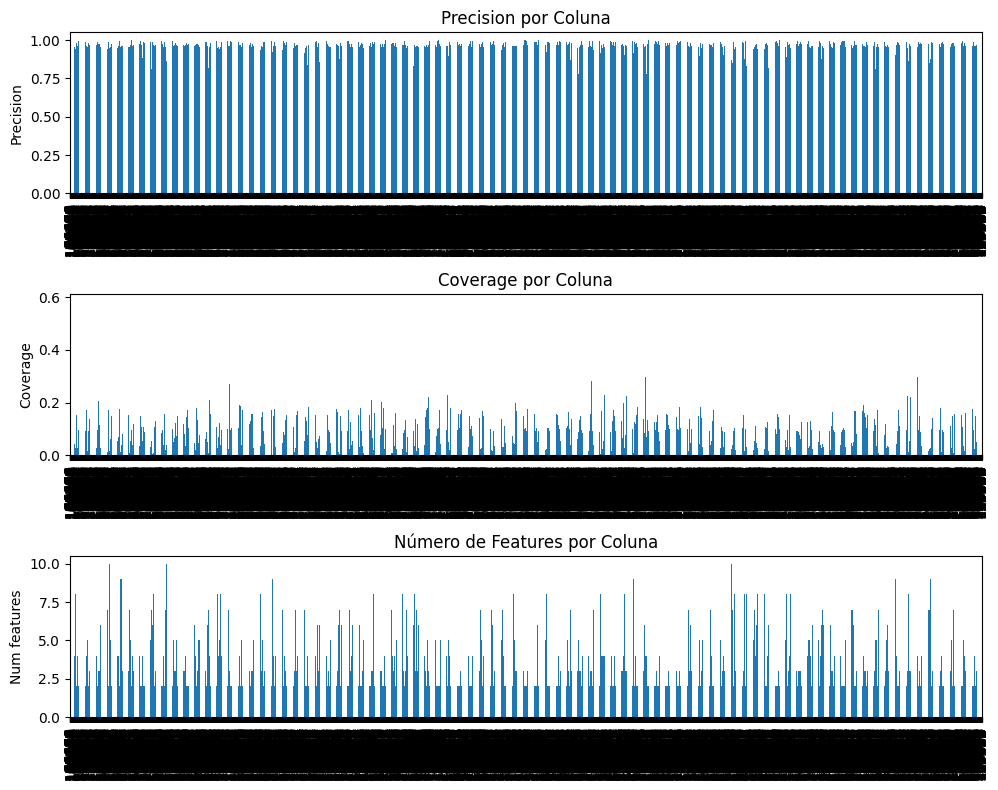

In [129]:
# Plotando precision e coverage
plt.figure(figsize=(10, 8))

# Plot para precision
plt.subplot(3, 1, 1)
df['precision'].plot(kind='bar', title='Precision por Coluna')
plt.ylabel('Precision')

# Plot para coverage
plt.subplot(3, 1, 2)
df['coverage'].plot(kind='bar', title='Coverage por Coluna')
plt.ylabel('Coverage')

# Plot para coverage
plt.subplot(3, 1, 3)
df['features'].apply(len).plot(kind='bar', title='Número de Features por Coluna')  # Calcula o tamanho de cada lista
plt.ylabel('Num features')

plt.tight_layout()
plt.show()

In [33]:
def filtrar_metricas(df, min_precision=0.8, min_coverage=0.3, top_n=100):
    """
    Filtra o DataFrame por precision e coverage, convertendo tipos se necessário.
    
    Args:
        df: DataFrame a ser filtrado
        min_precision: valor mínimo de precision
        min_coverage: valor mínimo de coverage
        top_n: número de top resultados para retornar
        
    Returns:
        Tuple: (df_filtrado, top_precision, top_coverage)
    """
    try:
        # Verificar e converter tipos
        if df['precision'].dtype == 'object':
            df['precision'] = pd.to_numeric(df['precision'], errors='coerce')
        if df['coverage'].dtype == 'object':
            df['coverage'] = pd.to_numeric(df['coverage'], errors='coerce')
        
        # Remover valores inválidos
        df = df.dropna(subset=['precision', 'coverage'])
        
        # Aplicar filtros
        mask = (df['precision'] >= min_precision) & (df['coverage'] >= min_coverage)
        df_filtrado = df[mask].copy()
        
        # Obter tops
        top_precision = df.nlargest(top_n, 'precision')
        top_coverage = df.nlargest(top_n, 'coverage')
        
        return df_filtrado, top_precision, top_coverage
        
    except Exception as e:
        print(f"Erro ao filtrar: {str(e)}")
        return None, None, None


df_filtrado, top_prec, top_cov = filtrar_metricas(df)

In [34]:
df_filtrado

,precision,coverage,features
339,0.804839,0.5278,"[{'feature_name': 'WKHP', 'feature_value': 40,..."
932,0.954449,0.3095,"[{'feature_name': 'SCHL', 'feature_value': 18,..."
1455,0.898723,0.4097,"[{'feature_name': 'OCCP', 'feature_value': 380..."
4690,0.953383,0.3967,"[{'feature_name': 'OCCP', 'feature_value': 422..."
7181,0.883408,0.3362,"[{'feature_name': 'WKHP', 'feature_value': 40,..."
7580,0.951521,0.3906,"[{'feature_name': 'SCHL', 'feature_value': 18,..."
8632,0.886364,0.4425,"[{'feature_name': 'OCCP', 'feature_value': 422..."
11163,0.958005,0.3023,"[{'feature_name': 'SCHL', 'feature_value': 19,..."
12573,0.838710,0.4350,"[{'feature_name': 'OCCP', 'feature_value': 380..."


In [36]:
for i in df_filtrado['features']:
    print(i)
    #print(df_filtrado[i])

[{'feature_name': 'WKHP', 'feature_value': 40, 'feature_weight': None, 'feature_ranges': 'WKHP <= 40.00', 'feature_rank': 1}, {'feature_name': 'SCHL', 'feature_value': 21, 'feature_weight': None, 'feature_ranges': 'SCHL <= 21.00', 'feature_rank': 2}, {'feature_name': 'COW', 'feature_value': 2, 'feature_weight': None, 'feature_ranges': 'COW <= 3.00', 'feature_rank': 3}, {'feature_name': 'SEX', 'feature_value': 1, 'feature_weight': None, 'feature_ranges': 'SEX <= 2.00', 'feature_rank': 4}]
[{'feature_name': 'SCHL', 'feature_value': 18, 'feature_weight': None, 'feature_ranges': 'SCHL <= 19.00', 'feature_rank': 1}, {'feature_name': 'WKHP', 'feature_value': 40, 'feature_weight': None, 'feature_ranges': 'WKHP <= 40.00', 'feature_rank': 2}, {'feature_name': 'OCCP', 'feature_value': 4020, 'feature_weight': None, 'feature_ranges': 'OCCP > 2205.00', 'feature_rank': 3}, {'feature_name': 'AGEP', 'feature_value': 50, 'feature_weight': None, 'feature_ranges': 'AGEP <= 55.00', 'feature_rank': 4}]
[{'